In [1]:
import warnings

import geopandas as gpd
import numpy as np
import rioxarray
import matplotlib.pyplot as plt

from streetscape import Streetscape

In [2]:
warnings.filterwarnings(
    "ignore",
    category=RuntimeWarning,
    message="invalid value encountered in intersection",
)

In [3]:
streets = gpd.read_file("bubenec.gpkg", layer="streets").to_crs(5514)
buildings = gpd.read_file("bubenec.gpkg", layer="buildings").to_crs(5514)
plots = gpd.read_file("bubenec.gpkg", layer="plots").to_crs(5514)

In [4]:
buildings["category"] = np.random.randint(0, 6, len(buildings))
buildings["height"] = np.random.randint(12, 30, len(buildings))

<Axes: >

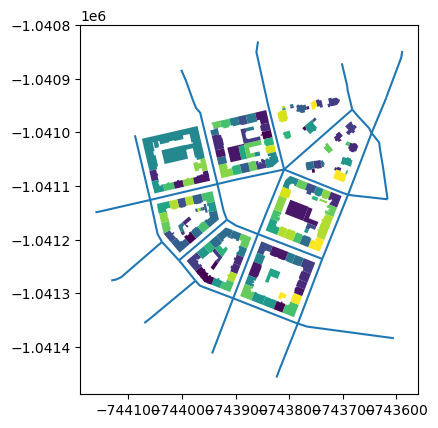

In [5]:
ax = streets.plot()
buildings.plot("height",  ax=ax)

In [6]:
sc = Streetscape(streets, buildings, category_col="category", height_col="height")

In [7]:
sc.compute_sightline_indicators()

In [8]:
df = sc._sightline_indicators
df.head(10)

,sight_line_points,left_OS_count,left_OS,left_SB_count,left_SB,left_H,left_HW,left_BUILT_COVERAGE,left_SEQ_SB_ids,left_SEQ_SB_categories,...,right_SEQ_SB_categories,front_SB,back_SB,left_SEQ_OS_endpoints,right_SEQ_OS_endpoints,nodes_degree_1,nodes_degree_4,nodes_degree_3_5_plus,street_length,windingness
uid,,,,,,,,,,,,,,,,,,,,,
0,[POINT (-743682.3672524728 -1040957.4995517571...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50.0, 50.0, 50.0, 50.0, 50.0, 23.978540643286...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 6.557430988391386, 1...","[133, 133, 134, 113, 113, 113, 113, 113, 114, ...","[5, 5, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, ...","[300, 300, 300, 300, 300, 300, 300, 300, 300, ...","[300, 300, 300, 300, 300, 300, 300, 300, 300, ...","[POINT (-743649.358826546 -1040995.0554277), P...",[POINT (-743715.3756783996 -1040919.9436758142...,0.0,0.0,1.0,169.444816,0.000000e+00
1,[POINT (-743915.6586370567 -1041163.2198232107...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],...,"[3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, ...","[20.81825924189013, 23.822374620986526, 26.826...","[75.51103865862497, 72.50692327936795, 69.5028...",[POINT (-743888.9193933376 -1041120.9704108441...,[POINT (-743942.3978807759 -1041205.4692355774...,0.0,0.5,0.5,64.086423,3.995452e-03
2,[POINT (-743690.286502645 -1041115.6839481713)...,"[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50.0, 50.0, 50.0, 50.0, 6.053620638568832, 6....","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[nan, nan, nan, nan, 6.053620638568832, 6.0753...","[nan, nan, nan, nan, 14.0, 14.0, 14.0, 14.0, 1...","[nan, nan, nan, nan, 2.312665565926479, 2.3043...","[0.0, 0.0, 0.0, 0.0, 43.94637936139353, 43.924...","[72, 72, 72, 72, 72, 72, 72, 71, 71, 71, 71, 7...","[4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 0, 0, 0, ...",...,"[5, 5, 5, 5, 5, 5, 5, 5, 1, 3, 3, 3, 3, 3, 3, ...","[300, 300, 300, 300, 300, 300, 300, 300, 300, ...","[74.32485739748887, 71.29295857176874, 68.2610...",[POINT (-743704.1066436523 -1041163.7360418045...,[POINT (-743676.4663616377 -1041067.6318545381...,0.0,0.5,0.5,128.339758,3.449492e-04
3,[POINT (-743618.5306065264 -1040935.0696088172...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],...,[],"[300, 300, 300, 300, 300, 300, 300, 300, 300, ...","[300, 300, 300, 300, 300, 300, 300, 300, 300, ...",[POINT (-743572.2338777864 -1040953.9538061254...,[POINT (-743664.8273352664 -1040916.185411509)...,0.0,0.5,0.0,71.974628,3.409819e-06
4,[POINT (-743701.3995463843 -1040871.2998835526...,"[19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[],...,[],"[300, 300, 300, 300, 300, 300, 300, 300, 300, ...","[300, 300, 300, 300, 300, 300, 300, 300, 300, ...",[POINT (-743652.7405326089 -1040859.797693396)...,[POINT (-743750.0585601598 -1040882.8020737092...,0.5,0.0,0.0,43.728428,1.2

<Axes: >

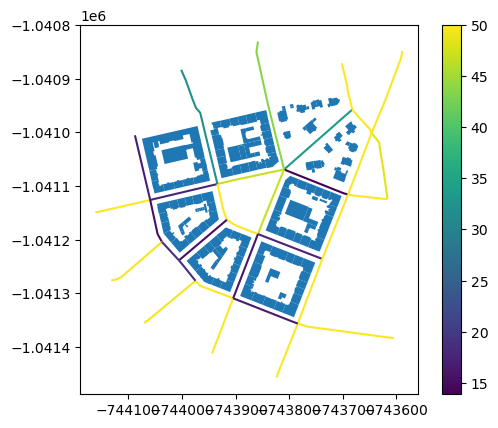

In [9]:
ax = sc.streets.plot(df.left_OS.apply(np.mean).values, legend=True)
buildings.plot(ax=ax)

<Axes: >

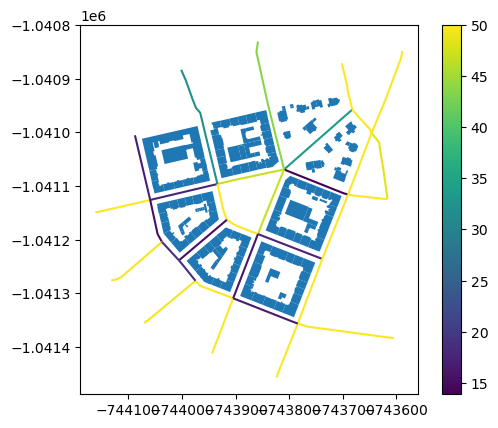

In [10]:
ax = streets.plot(df.left_OS.apply(np.mean), legend=True)
buildings.plot(ax=ax)

<Axes: >

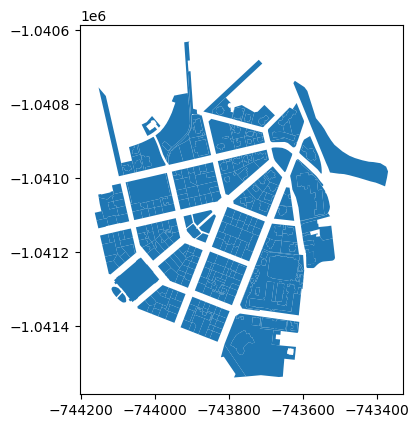

In [11]:
plots.plot()

In [12]:
sc.compute_plot_indicators(plots)

In [13]:
df_plots = sc._plot_indicators
df_plots.head(2)

,uid,left_parcel_SB_count,left_parcel_SEQ_SB_ids,left_parcel_SEQ_SB,left_parcel_SEQ_SB_depth,right_parcel_SB_count,right_parcel_SEQ_SB_ids,right_parcel_SEQ_SB,right_parcel_SEQ_SB_depth
uid,,,,,,,,,
0,0,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[103, 103, 103, 103, 103, 103, 103, 103, 104, ...","[9.88393014474684, 9.874298146475384, 9.864666...","[40.24894258800112, 41.82368914849914, 36.8410...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[383, 383, 383, 383, 383, 383, 383, 383, 383, ...","[14.5694327036822, 10.08937470497476, 10.09945...","[19.240137542293866, 18.01382727194868, 15.660..."
1,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[243, 243, 243, 243, 243, 243, 243, 243, 243, ...","[15.26214531480629, 14.398958954323607, 13.535...","[26.907651647814113, 26.783480781444453, 26.65...","[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, ...","[239, 239, 239, 239, 239, 239, 239, 239, 240, ...","[29.983960648659824, 21.40784210086052, 13.294...","[5.687357029440683, 15.194809302522795, 24.239..."


/Users/martin/dev/uscuni/streetscape/.pixi/envs/default/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/martin/dev/uscuni/streetscape/.pixi/envs/default/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: >

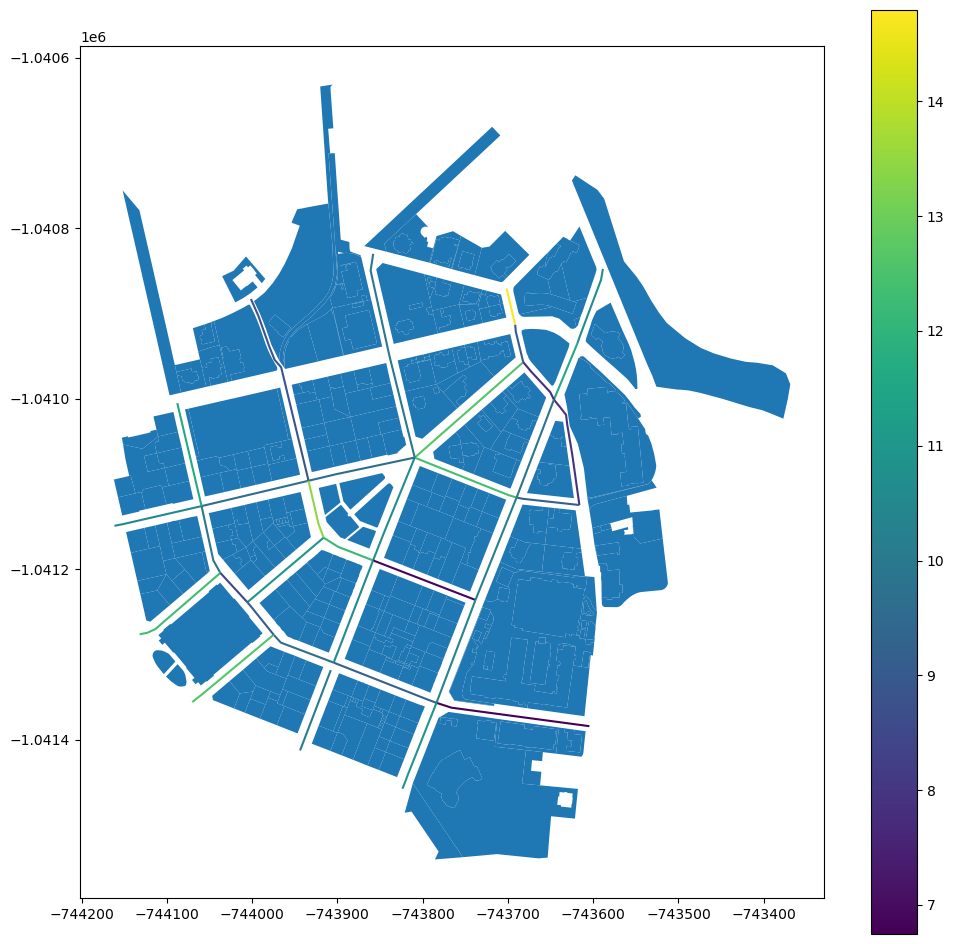

In [14]:
ax = streets.plot(df_plots.right_parcel_SEQ_SB.apply(np.mean).values, legend=True, figsize=(12, 12))
plots.plot(ax=ax)

In [15]:
sc.compute_street_indicators()

In [16]:
street_df = sc.street_indicators
street_df.head(2)

,N,n_l,n_r,left_OS,right_OS,OS,left_OS_STD,right_OS_STD,OS_STD,left_OS_MAD,...,left_par_tot_15,right_par_tot_15,left_par_rel_15,right_par_rel_15,left_built_freq,right_built_freq,built_freq,left_built_coverage,right_built_coverage,built_coverage
uid,,,,,,,,,,,,,,,,,,,,,
0,57,28,38,33.607135,38.163914,71.771049,14.794107,12.059253,13.436283,13.873261,...,0.017857,0.000000,0.037037,0.000000,0.053115,0.053115,0.106229,0.185898,0.150816,0.168357
1,22,0,19,50.000000,17.497487,67.497487,0.000000,14.015687,9.794670,0.000000,...,0.000000,0.761905,NaN,0.888889,0.000000,0.046812,0.046812,0.000000,0.455883,0.227942


In [17]:
street_df.columns

Index(['N', 'n_l', 'n_r', 'left_OS', 'right_OS', 'OS', 'left_OS_STD',
       'right_OS_STD', 'OS_STD', 'left_OS_MAD', 'right_OS_MAD', 'OS_MAD',
       'left_OS_med', 'right_OS_med', 'OS_med', 'left_OS_MAD_med',
       'right_OS_MAD_med', 'OS_MAD_med', 'left_SB', 'right_SB', 'SB',
       'left_SB_STD', 'right_SB_STD', 'SB_STD', 'left_SB_MAD', 'right_SB_MAD',
       'SB_MAD', 'left_SB_med', 'right_SB_med', 'SB_med', 'left_SB_MAD_med',
       'right_SB_MAD_med', 'SB_MAD_med', 'left_H', 'right_H', 'H',
       'left_H_STD', 'right_H_STD', 'H_STD', 'left_HW', 'right_HW', 'HW',
       'left_HW_STD', 'right_HW_STD', 'HW_STD', 'csosva', 'tan', 'tan_STD',
       'n_tan_ratio', 'tan_ratio', 'tan_ratio_STD', 'par_tot', 'par_rel',
       'left_par_tot', 'right_par_tot', 'left_par_rel', 'right_par_rel',
       'par_tot_15', 'par_rel_15', 'left_par_tot_15', 'right_par_tot_15',
       'left_par_rel_15', 'right_par_rel_15', 'left_built_freq',
       'right_built_freq', 'built_freq', 'left_built_coverag

<Axes: >

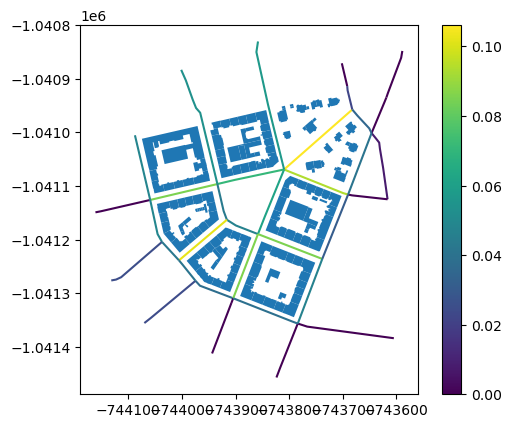

In [18]:
ax = streets.plot(street_df["built_freq"].values, legend=True)
buildings.plot(ax=ax)

In [19]:
dtm = rioxarray.open_rasterio("bubenec.tif")

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

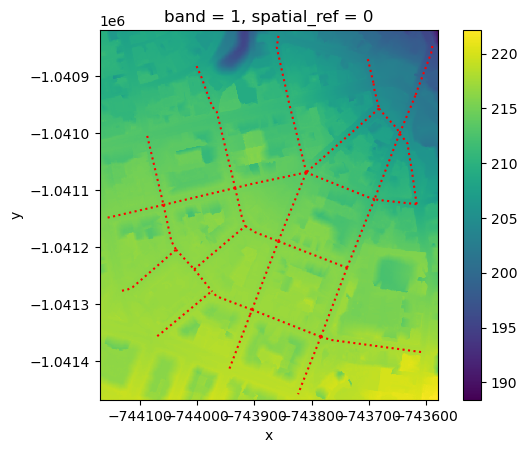

In [20]:
f, ax = plt.subplots()
dtm.plot(ax=ax)
streets.plot(ax=ax, color="red", zorder=20, linestyle="dotted")

In [21]:
sc.compute_slope(dtm.drop_vars("band"))

In [22]:
slope = sc.slope
slope.head()

,slope_degree,slope_percent,n_slopes,slope_valid
0,2.809318,0.049073,57,True
1,0.166605,0.002908,22,True
2,1.122029,0.019587,43,True
3,2.735747,0.047794,24,True
4,1.505840,0.026294,15,True


<Axes: >

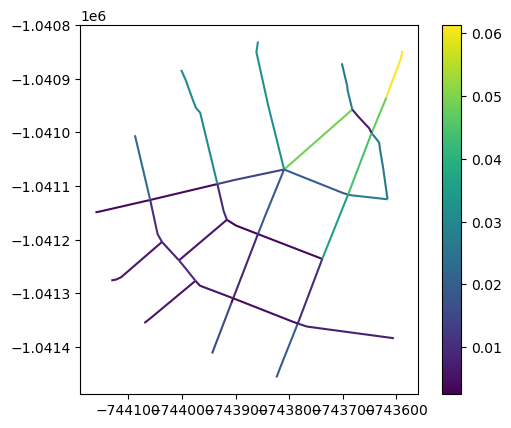

In [23]:
sc.streets.plot(slope.slope_percent.values, legend=True)


In [24]:
sc.compute_prevalences()

In [25]:
sc.prevalences

,building_prevalence[0],building_prevalence[1],building_prevalence[2],building_prevalence[3],building_prevalence[4],building_prevalence[5]
uid,,,,,,
0,0.166667,0.181818,0.151515,0.121212,0.106061,0.272727
1,0.000000,0.263158,0.368421,0.368421,0.000000,0.000000
2,0.210526,0.122807,0.000000,0.210526,0.122807,0.333333
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.391304,0.000000,0.086957,0.000000,0.108696,0.413043
6,0.159091,0.000000,0.181818,0.250000,0.090909,0.318182
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.157143,0.300000,0.171429,0.000000,0.100000,0.271429
